# Analysis Notebook

This is a Jupyter notebook used for the visual analysis of the data of
the performance of two Dijkstra's algorithm implementations.

- Matplotlib is required for plotting.

Author: Juniper Pasternak  
Date: 2024-05-14

In [2]:
import json
import math
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import FuncFormatter

In [3]:
# Load the data from the file
with open('data.json') as f:
    data: list[dict[str, list[dict[str, int]]]] = json.load(f)

In [4]:
# Extract the data
d_constant = data[0] # Avg 4 edges per node
d_log = data[1] # Avg log_2(n-1) edges per node
d_linear = data[2] # Avg 0.5 * (n-1) edges per node

In [5]:
# Get the sizes of the graphs
sizes = [int(x) for x in d_constant.keys()]
sizes.sort()
sizes

[10, 25, 50, 100, 250, 500]

In [6]:
def plot_run_ops(data: dict[str, list[dict[str, int]]], title) -> Figure:
    """Generate a plot of the number of operations for each size of graph.

    Args:
        data (dict[str, list[dict[str, int]]]): dictionary for one density group
        title (_type_): title of the plot

    Returns:
        Figure: figure object of the plot
    """
    # Extract the data
    x = sizes
    y_simple = [data[str(size)][0]["simple_ops"] for size in sizes]
    y_heap = [data[str(size)][0]["heap_ops"] for size in sizes]

    # Create the plot
    fig, ax = plt.subplots()
    fig.suptitle(title)
    ax.set_xlabel("Nodes")
    ax.set_ylabel("Operations")

    # Add commas to the y-axis markers
    formatter = FuncFormatter(lambda x, pos: "{:,}".format(int(x)))
    ax.yaxis.set_major_formatter(formatter)

    # Plot the data
    ax.plot(x, y_simple, label="Simple")
    ax.plot(x, y_heap, label="Heap")

    # Add styling
    ax.legend()
    ax.grid(True)

    return fig

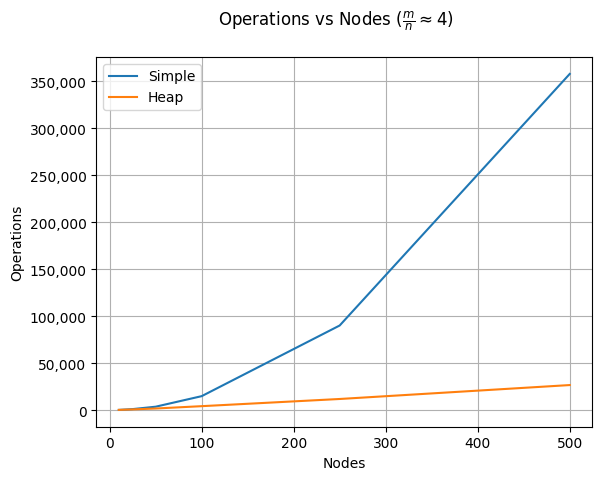

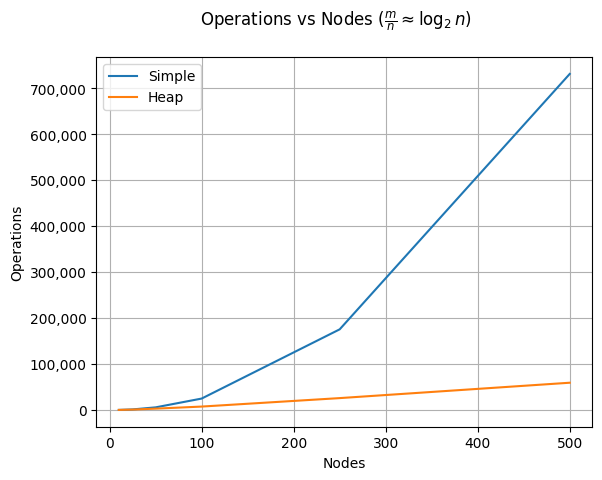

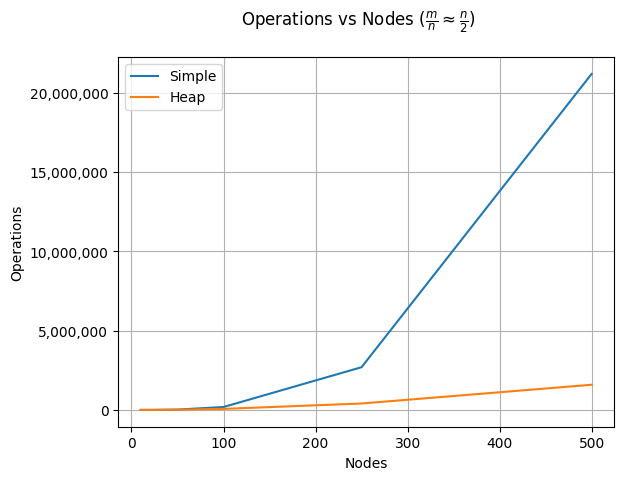

In [7]:
constant = plot_run_ops(d_constant, r"Operations vs Nodes ($\frac{m}{n} \approx 4$)")
log = plot_run_ops(d_log, r"Operations vs Nodes ($\frac{m}{n} \approx \log_{2}n$)")
linear = plot_run_ops(d_linear, r"Operations vs Nodes ($\frac{m}{n} \approx \frac{n}{2}$)")

In [8]:
def plot_ratio(data: dict[str, list[dict[str, int]]], title) -> Figure:
    """Generate a plot of the ratio of actual operations to predicted for each size of graph.

    Args:
        data (dict[str, list[dict[str, int]]]): dictionary for one density group
        title (_type_): title of the plot

    Returns:
        Figure: figure object of the plot
    """
    # Extract the data
    x = sizes

    simple_data = [data[str(size)][0] for size in sizes]
    y_simple = [x["simple_ops"] / (x["n"] * x["m"]) for x in simple_data]
    
    heap_data = [data[str(size)][0] for size in sizes]
    y_heap = [x["heap_ops"] / (x["m"] * math.log2(x["m"])) for x in heap_data]

    # Create the plot
    fig, ax = plt.subplots()
    fig.suptitle(title)
    ax.set_xlabel("Nodes")
    ax.set_ylabel(r"$\frac{Operations}{Predicted}$")

    # Plot the data
    ax.plot(x, y_simple, label="Simple")
    ax.plot(x, y_heap, label="Heap")

    # Add styling
    ax.legend()
    ax.grid(True)

    return fig

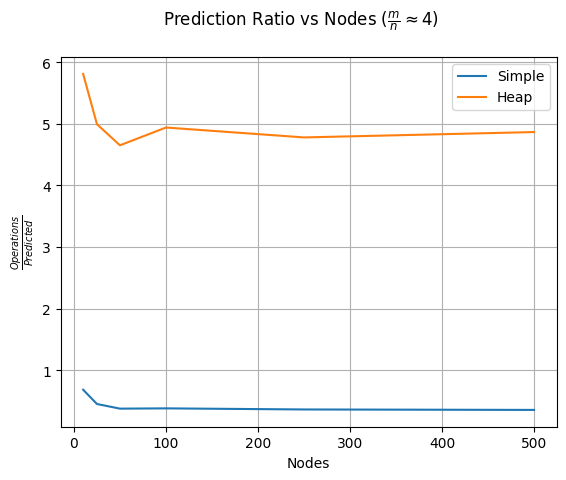

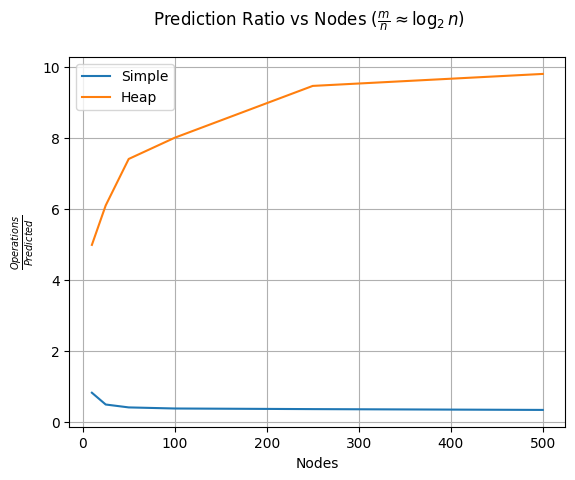

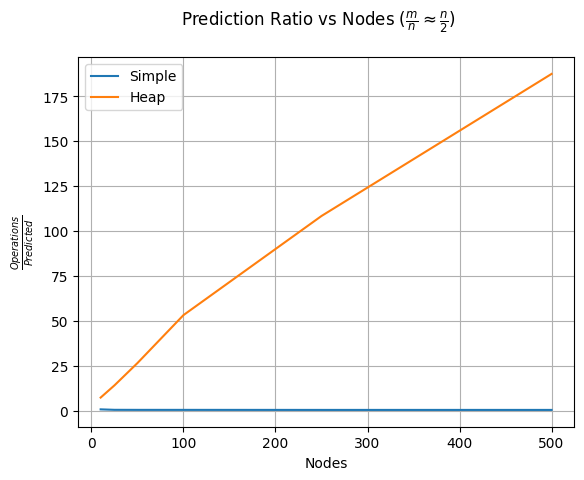

In [9]:
constant = plot_ratio(d_constant, r"Prediction Ratio vs Nodes ($\frac{m}{n} \approx 4$)")
log = plot_ratio(d_log, r"Prediction Ratio vs Nodes ($\frac{m}{n} \approx \log_{2}n$)")
linear = plot_ratio(d_linear, r"Prediction Ratio vs Nodes ($\frac{m}{n} \approx \frac{n}{2}$)")